In [166]:
%matplotlib inline # Cause plots to be placed inside workbook, not in sep. window

from scipy import stats
from scipy.cluster.vq import kmeans,vq,whiten
from matplotlib.pyplot import plot,scatter,show,ylabel,xlabel
import numpy
import pandas
from pandas import DataFrame
import os
dataPath = os.path.join(os.getenv("HOME"), 
                        'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/sliderMinimizationFromScratchTmp.csv')

data = pandas.read_csv(dataPath)

In [2]:
data[:10]

,response_id,question,sliderSetting
0,1276242,Team|GetsInWay,76
1,1276242,Team|LooseGroup,76
2,1276242,Team|Alienated,82
3,1276242,Team|HoHum,82
4,1276242,Team|MustProveMySelf,82
5,1276242,Team|Invisible,71
6,1276242,Team|NotPartOfGroup,76
7,1276242,Team|PowerStruggles,76
8,1276242,Team|DontSocialize,29
9,1276242,Team|HardToInfluence,71


### Make columns out of the values in 'question' column, filling sliderSetting into the resulting cells:

In [2]:
dataPiv = pandas.pivot_table(data, values='sliderSetting', index='response_id', columns='question')

In [4]:
dataPiv[:10]

#len(data[:1])


question,GenderBalance|MenTalkDifferently,GenderBalance|MustProveMyselfDaily,GenderBalance|NoClearValues,GenderBalance|TreatedDifferently,GenderBalance|UsuallyOnlyWoman,Manager|AmOnMyOwn,Manager|ExpectedToAlreadyKnow,Manager|HesitateNewChallenges,Manager|MatesQuestionWorkQuality,Manager|MatesUninvolved,...,Team|NotPartOfGroup,Team|PowerStruggles,WorkLife|HateCompany,WorkLife|HateJob,WorkLife|HateManager,WorkLife|HateProduct/project,WorkLife|HateTeam,WorkLife|ReceivedBadReview,WorkLife|ThinkOfLeavingProfession,WorkLife|ThinkingOfLeavingJob
response_id,,,,,,,,,,,,,,,,,,,,,
1276242,71.0,82.0,88.0,94.0,47.0,65.0,59.0,59.0,82.0,47.0,...,76.0,76.0,76.0,88.0,76.0,82.0,82.0,59.0,82.0,88.0
1276245,88.0,82.0,88.0,88.0,88.0,76.0,41.0,76.0,71.0,65.0,...,59.0,47.0,94.0,94.0,88.0,88.0,88.0,94.0,88.0,82.0
1276247,65.0,71.0,71.0,53.0,71.0,76.0,94.0,82.0,88.0,82.0,...,76.0,59.0,94.0,88.0,94.0,88.0,94.0,94.0,76.0,76.0
1276250,41.0,12.0,24.0,71.0,88.0,24.0,88.0,76.0,35.0,47.0,...,59.0,29.0,88.0,71.0,53.0,71.0,59.0,65.0,71.0,71.0
1276252,94.0,94.0,71.0,100.0,59.0,71.0,94.0,47.0,76.0,94.0,...,53.0,94.0,88.0,82.0,94.0,82.0,94.0,94.0,47.0,47.0
1276253,71.0,35.0,41.0,59.0,71.0,53.0,94.0,94.0,94.0,94.0,...,53.0,24.0,53.0,59.0,65.0,71.0,65.0,82.0,71.0,71.0
1276260,88.0,94.0,100.0,100.0,82.0,94.0,88.0,53.0,88.0,88.0,...,94.0,82.0,82.0,76.0,82.0,100.0,88.0,94.0,71.0,71.0
1276261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1276279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Ensure that table does not contain NaNs: replace them with 0s:

In [3]:
dataPiv.fillna(0, inplace=True)

In [6]:
len(dataPiv)

184

In [7]:
len(data)

5288

### Save the non-NaN dataset for later use:

In [8]:
# dataPathOut = os.path.join(os.getenv("HOME"),
#                           'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/slidersByItem.csv')
# dataPiv.to_csv(dataPathOut)

In [6]:
normalizedObservations = whiten(dataPiv)

### Run multiple k-means with varying k, and plot the respective distortions:

In [144]:
#multipleKMeans = DataFrame([(k,) + kmeans(normalizedObservations, k) for k in range(4,15)],
#                          columns=['k','centroids','distortion'])
multipleKMeans = DataFrame([[k] + list(kmeans(normalizedObservations, k)) for k in range(4,15)],
                          columns=['k','centroids','distortion'])

In [145]:
multipleKMeans

,k,centroids,distortion
0,4,"[[1.47820478989, 0.583150380428, 1.12108407049...",4.032406
1,5,"[[0.766109525332, 0.421796486417, 0.6615115873...",3.776515
2,6,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0758810589707, 0....",3.603964
3,7,"[[1.69151305387, 1.07921721697, 1.25890225067,...",3.521753
4,8,"[[0.732800415535, 0.403457508747, 0.6327502140...",3.443001
5,9,"[[1.98731097765, 1.82487583319, 1.84437802341,...",3.356992
6,10,"[[1.64252806046, 1.544933013, 1.79157716753, 1...",3.316172
7,11,"[[2.01246681281, 1.90511413032, 2.02076445605,...",3.278940
8,12,"[[0.0781154881289, 0.0, 0.0618559397138, 0.067...",3.229446
9,13,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",3.197664


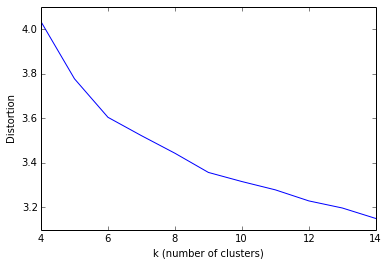

In [146]:
plot(multipleKMeans['k'], multipleKMeans['distortion'])
ylabel('Distortion')
xlabel('k (number of clusters)')
show()

### Pick the centroids of the 8-clusters k:

In [158]:
# I Should be able to pick the 'centroids' column in the row that holds
# the k-means result for k-8 in the table above. But I can't
# get the result datatypes to work. So re-compute the k-means
# for k=8:
#centroids = DataFrame(multipleKMeans[multipleKMeans['k']==8]['centroids'])
(centroids, distortion) = kmeans(normalizedObservations, 8)

In [159]:
centroids

array([[ 1.96455094,  2.35268707,  2.25288482,  2.15299967,  1.98885624,
         2.41561931,  2.34145794,  2.12652952,  2.40708154,  2.43199183,
         2.27094877,  2.45481009,  2.20857604,  1.86077098,  2.37543673,
         2.48661131,  2.29556344,  1.92223998,  3.48121382,  2.10023584,
         2.80258205,  2.91644309,  3.56538572,  3.72612727,  3.08053916,
         2.97766268,  3.08845301,  2.54638327,  2.94875461,  3.2805804 ,
         2.65756511,  2.17522939,  2.29502991,  2.31149018,  2.18712635,
         2.30908691,  2.20957769,  2.06867697,  2.23180808],
       [ 1.9725456 ,  1.82839607,  1.91727664,  2.02763892,  1.9514452 ,
         1.47037697,  1.66141711,  1.74144752,  1.94636031,  1.75739597,
         1.6864717 ,  1.56675002,  1.90245472,  1.55631345,  1.61940053,
         1.89556228,  1.54420976,  1.5615465 ,  2.80834308,  1.16623998,
         2.52377705,  2.086751  ,  2.6756785 ,  3.04115359,  2.12373378,
         2.51800643,  2.43018632,  1.79023193,  2.38168642,  2.

### Assign each observation to one of the 8 clusters:

In [160]:
(clusterIndexes,cdist) = vq(normalizedObservations, centroids)

In [161]:
clusterIndexes

array([1, 1, 1, 6, 1, 1, 0, 2, 2, 6, 4, 0, 1, 7, 5, 1, 2, 1, 5, 0, 5, 7, 1,
       6, 0, 5, 5, 5, 6, 2, 2, 7, 1, 5, 7, 0, 6, 3, 5, 7, 1, 5, 6, 7, 1, 6,
       5, 4, 3, 1, 1, 2, 1, 6, 1, 7, 7, 0, 5, 1, 5, 4, 7, 1, 2, 3, 5, 1, 4,
       1, 7, 6, 2, 0, 4, 7, 6, 6, 4, 5, 0, 3, 7, 2, 1, 2, 0, 6, 1, 5, 6, 1,
       6, 1, 4, 1, 1, 4, 1, 5, 5, 6, 1, 3, 7, 1, 6, 7, 2, 5, 6, 6, 5, 3, 2,
       7, 2, 1, 6, 1, 0, 6, 0, 1, 3, 0, 6, 6, 0, 5, 1, 6, 5, 1, 0, 5, 5, 5,
       3, 3, 5, 4, 6, 5, 6, 1, 7, 2, 4, 1, 2, 3, 1, 7, 7, 0, 1, 3, 6, 5, 1,
       1, 7, 0, 1, 0, 1, 6, 6, 0, 3, 1, 3, 1, 1, 5, 5, 0, 0, 1, 7, 0, 4, 6], dtype=int32)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


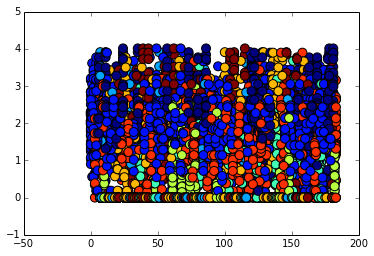

In [167]:
# Rows are observations, columns are features;
# Get number of features:
(numObservations, numFeatures) = normalizedObservations.shape
for i in range(numFeatures):
        # Make a vector for the X-axis, and 
        # plot the observations for the current
        # loop against that axis. Dot size is 80.
        # Color is controlled by the cluster indexes.
        # The  normalizedObservations[:,i] picks the
        # (column-)vector of one feature down all of
        # the observations:
        scatter(numpy.arange(0,len(normalizedObservations[:,i])), 
                normalizedObservations[:,i], 
                s=80, 
                c=clusterIndexes)
show()       


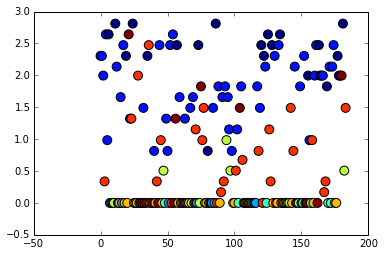

In [168]:
scatter(numpy.arange(0,len(normalizedObservations[:,0])),
        normalizedObservations[:,1],
        s=80,
        c=clusterIndexes)